In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
from scipy import stats
import numpy as np
import seaborn as sns
import datetime as dt
import random as rnd
import matplotlib.pyplot as plt
from copy import deepcopy as dc
from collections import Counter
import optuna 
import xgboost as xgb
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

Dataset is indicating bankruptcy situation for companies.

In [ ]:
df = pd.read_csv("data.csv")

Data Exploration

There are no null values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [ ]:
df.shape, df.drop_duplicates().shape

((6819, 96), (6819, 96))

In [ ]:
target_col = "Bankrupt?"

In [ ]:
df[target_col].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

There is class imbalance

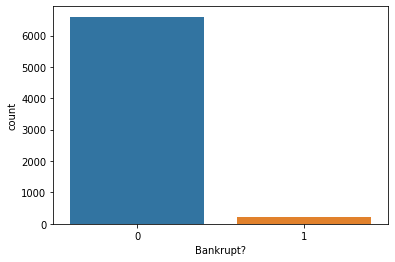

In [ ]:
sns.countplot(x=df['Bankrupt?'])

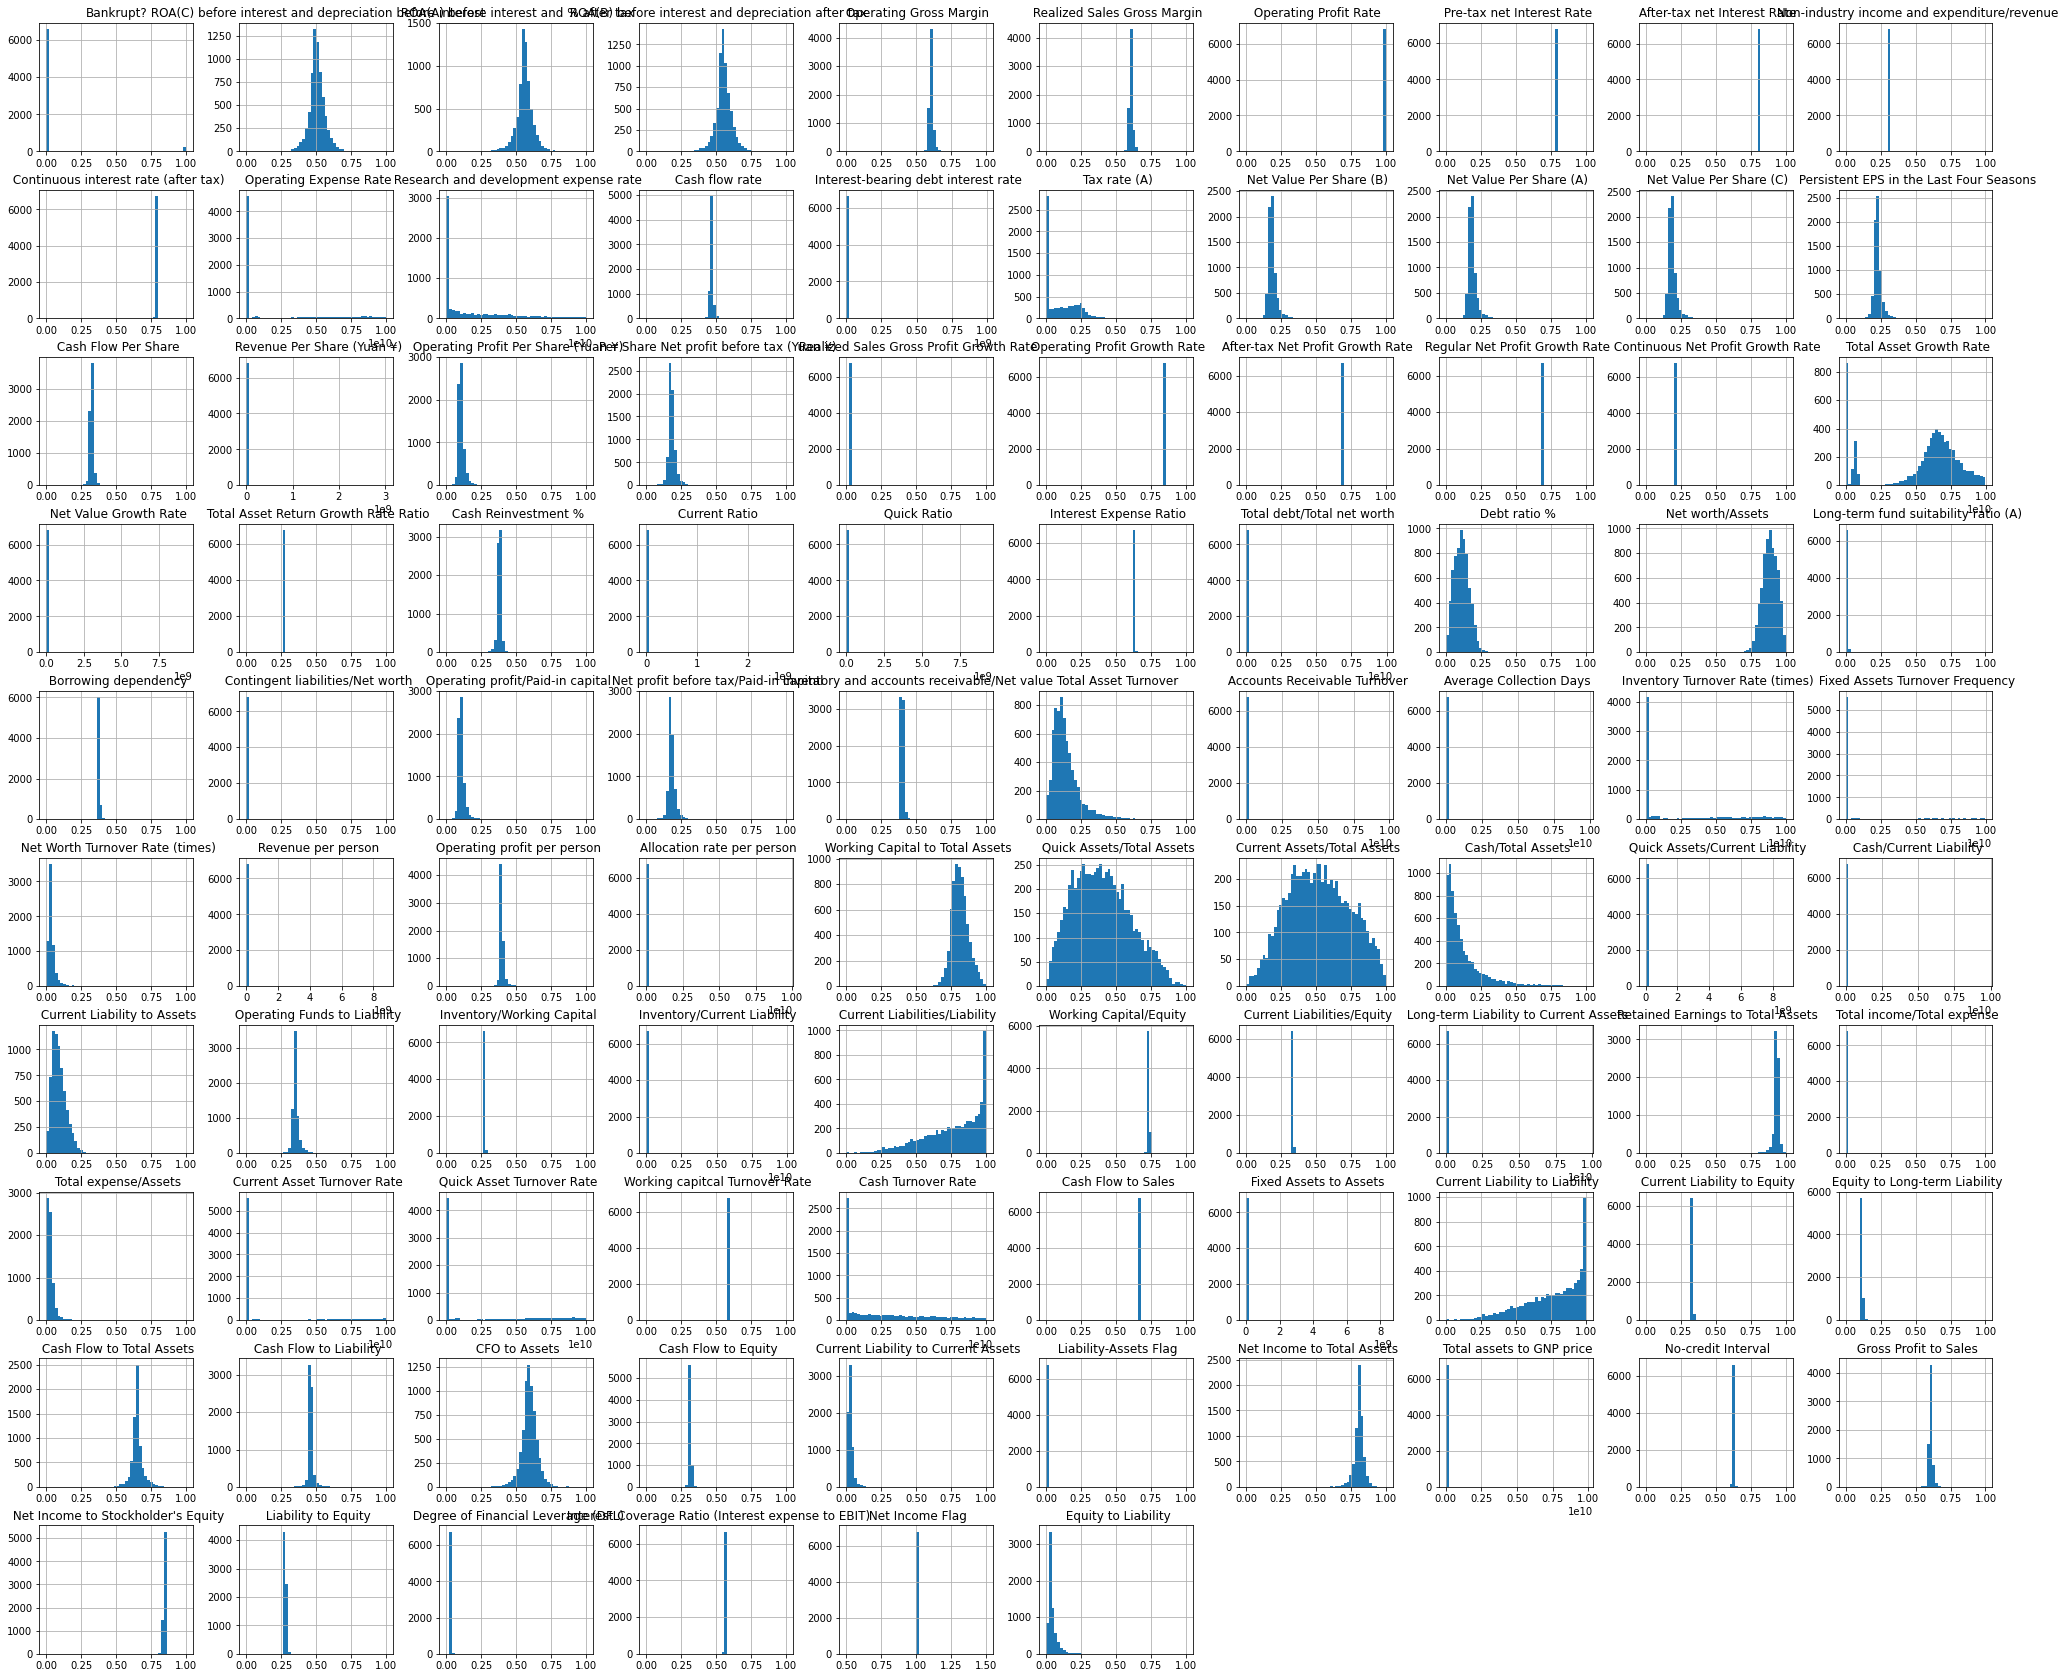

In [ ]:
df.hist(figsize = (35,30), bins = 50)
plt.show()

There are outliers in dataset

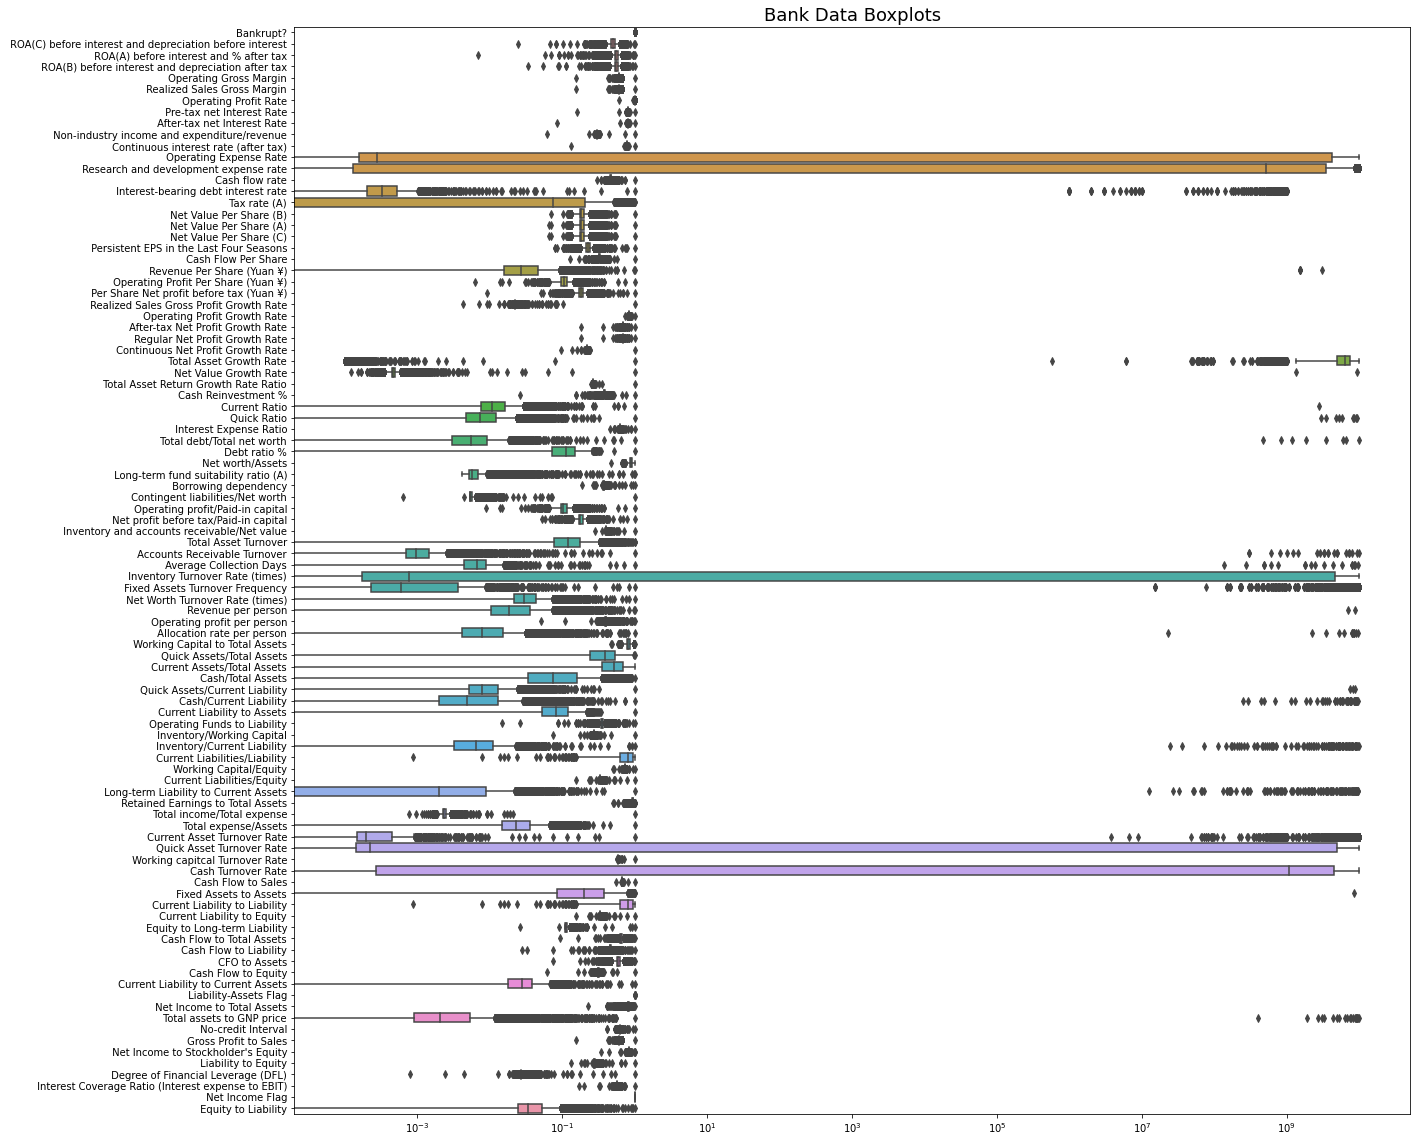

In [ ]:
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = df, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

### Data Analysis

In [ ]:
def rm_outliers_qrt(data, col):
    q25, q75 = np.percentile(data[col], 25), np.percentile(data[col], 75)
    iqr = q75 - q25
    lim = iqr * 1.5
    lower, upper = q25 - lim, q75 + lim
    outliers = [x for x in data[col] if x < lower or x > upper]
    data = data.drop(data[(data[col] > upper) | (data[col] < lower)].index)    
    return data

In [ ]:
def rm_outliers_std(data, col, threshold=3.0):
    z_scores = scipy.stats.zscore(data[col])
    abs_z_scores = np.abs(z_scores)
    data['zscore'] = abs_z_scores
    data.loc[data["zscore"]>threshold, col] = np.nan
    data=data.dropna()
    return data.drop("zscore",axis=1)

After trying outlier removal methods (based on zscore and quartiles seperately), dataset has little entries. Will be trying different methods

In [ ]:
df_cleaned1 = dc(df)
for col in df.columns:
  df_cleaned1 = rm_outliers_qrt(df_cleaned1, col)

In [ ]:
df_cleaned2 = dc(df)
for col in df.columns:
  df_cleaned2 = rm_outliers_std(df_cleaned2, col)

In [ ]:
df_cleaned1.shape, df_cleaned2.shape

((102, 96), (0, 96))

In [ ]:
X=df.drop(labels=[target_col], axis=1)
y=df[target_col]

Kruskal test to detect for each feature if there is significant difference between medians of the group with label 1 and 0.

In [ ]:
di={}
for i in X.columns:
  try:
    di[i]=stats.kruskal(X[i].loc[y[y == 1].index],
              X[i].loc[y[y == 0].index])[1]
  except:
    di[i] = 1

In [ ]:
pd.DataFrame().from_dict(di, orient="index")

,0
ROA(C) before interest and depreciation before interest,4.175977e-76
ROA(A) before interest and % after tax,2.518573e-75
ROA(B) before interest and depreciation after tax,1.734284e-76
Operating Gross Margin,3.449831e-34
Realized Sales Gross Margin,1.031769e-33
...,...
Liability to Equity,1.069576e-61
Degree of Financial Leverage (DFL),5.791481e-34
Interest Coverage Ratio (Interest expense to EBIT),6.600409e-26
Net Income Flag,1.000000e+00


"Net Income Flag" feature has only 1 unique value.

In [ ]:
df[" Net Income Flag"].value_counts()

1    6819
Name:  Net Income Flag, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)    

In [ ]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

Trying MinMax, Standard and Robust scalers for preprocessing, PCA and KBest methods for feature selection, XGBoost, logistic regression and random forest for modelling with hyperparameter tuning.

In [ ]:
def objective(trial, clf):
    scalers = trial.suggest_categorical("scalers", ['robust', 'standard', 'minmax'])
    if scalers == "minmax":
        scaler = MinMaxScaler()
    elif scalers == "standard":
        scaler = StandardScaler()
    else:
        scaler = RobustScaler()
    dim_red = trial.suggest_categorical("dim_red", ["PCA", "KBest"])
    if dim_red == "PCA":
        pca_n_components=trial.suggest_int("pca_n_components", 2, 30) 
        dimen_red_algorithm=PCA(n_components=pca_n_components)
    else:
        k=trial.suggest_int("k", 12, 30)
        dimen_red_algorithm=SelectKBest(k=k)
    if clf == "xgb":
        param = {
            'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
            'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
            'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
            'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
            'n_estimators': 10000,
            'max_depth': trial.suggest_categorical('max_depth', [3,5,7,9,11]),
            'random_state': trial.suggest_categorical('random_state', [42]),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        }
        estimator = xgb.XGBClassifier(**param) 
    elif clf == "logreg":
        logreg_c = trial.suggest_float("logreg_c", 1e-10, 1e10, log=True)
        estimator = LogisticRegression(C=logreg_c)
    else:
        rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 1000)
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
        estimator = RandomForestClassifier(max_depth=rf_max_depth, n_estimators=rf_n_estimators)
    pipeline = make_pipeline(scaler, dimen_red_algorithm, estimator)
    score = cross_val_score(pipeline, X_train, y_train, scoring='f1')
    f1 = score.mean() 
    return f1

In [ ]:
def get_scores(pipeline, tuning_method):
    kfold = StratifiedKFold(5)
    score = cross_val_score(pipeline, X_train, y_train, scoring='f1_micro', cv=kfold)
    print("Training set: %0.2f mean f1" % (score.mean()))
    pipeline.fit(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)
    print("Testing set: %0.2f mean accuracy" % test_score)
    y_predicted = pipeline.predict(X_test)
    print("Classification report for the testing set:")
    print(classification_report(y_test, y_predicted))
    scores = classification_report(y_test, y_predicted, output_dict=True)
    list_of_dfs = []
    for class_number in range(2):
        each_score = list(scores[str(class_number)].values())[:-1]  
        metric = list(scores[str(class_number)].keys())[:-1]      
        class_name = list(str(class_number)*3)                   
        tuning = [tuning_method for i in range(3)]                     
        data = list(zip(each_score, metric, class_name, tuning))
        scores_df = pd.DataFrame(data=data, columns=['score', 'metric', 'class', 'tuning method'])
        list_of_dfs.append(scores_df)
    class_scores = pd.concat(list_of_dfs)
    return class_scores

In [ ]:
best_params = {}
for i in ["xgb","logreg","rf"]:
    study = optuna.create_study(direction="maximize") 
    study.optimize(lambda trial: objective(trial, i), n_trials=30, timeout=600) 
    best_params[i] = study.best_params

[I 2022-05-03 13:13:17,347] A new study created in memory with name: no-name-8ab40cc7-dcbb-41c3-bb6c-d1ecc39117ee
[I 2022-05-03 13:16:28,911] Trial 0 finished with value: 0.8695707598076959 and parameters: {'scalers': 'standard', 'dim_red': 'PCA', 'pca_n_components': 24, 'lambda': 1.0358038640036717, 'colsample_bytree': 0.5, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 9, 'random_state': 42, 'min_child_weight': 299}. Best is trial 0 with value: 0.8695707598076959.
[I 2022-05-03 13:22:45,111] Trial 1 finished with value: 0.8550472377131257 and parameters: {'scalers': 'robust', 'dim_red': 'PCA', 'pca_n_components': 26, 'lambda': 1.6802698711368569, 'colsample_bytree': 0.7, 'subsample': 0.5, 'learning_rate': 0.018, 'max_depth': 5, 'random_state': 42, 'min_child_weight': 186}. Best is trial 0 with value: 0.8695707598076959.
[I 2022-05-03 13:26:09,310] Trial 2 finished with value: 0.887112397645393 and parameters: {'scalers': 'robust', 'dim_red': 'KBest', 'k': 12, 'lambda': 3.48591

In [ ]:
for clf in best_params.keys():
  bp = best_params[clf]
  if bp["scalers"] == "minmax":
    scaler = MinMaxScaler()
  elif bp["scalers"] == "standard":
    scaler = StandardScaler()
  else:
    scaler = RobustScaler()
  bp.pop('scalers')
  if bp["dim_red"] == "PCA":
    dimen_red_algorithm=PCA(n_components=bp["pca_n_components"])
    bp.pop("pca_n_components")
  else:
    dimen_red_algorithm=SelectKBest(k=bp["k"])
    bp.pop("k")
  bp.pop("dim_red")
  if clf == "xgb":
    est = xgb.XGBClassifier(**bp)
  elif clf == "logreg":
    est = LogisticRegression(C=bp['logreg_c'])
  else:
    est = RandomForestClassifier(max_depth=bp["rf_max_depth"], n_estimators=bp["rf_n_estimators"])
  pipeline = make_pipeline(scaler, dimen_red_algorithm, est)
  print("Classifier: {}".format(clf))
  mean_f1_trained_scores = get_scores(pipeline, "mean f1")

Classifier: xgb
Training set: 0.86 mean f1
Testing set: 0.90 mean accuracy
Classification report for the testing set:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1320
           1       0.20      0.77      0.32        44

    accuracy                           0.90      1364
   macro avg       0.60      0.84      0.63      1364
weighted avg       0.97      0.90      0.92      1364

Classifier: logreg
Training set: 0.89 mean f1
Testing set: 0.88 mean accuracy
Classification report for the testing set:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1320
           1       0.17      0.70      0.27        44

    accuracy                           0.88      1364
   macro avg       0.58      0.79      0.60      1364
weighted avg       0.96      0.88      0.91      1364

Classifier: rf
Training set: 0.96 mean f1
Testing set: 0.93 mean accuracy
Classification report for the tes

Since this is a fraud detection case, I prefer the model with highest recall value on minority class, which is with the XGBoost model. 